In [2]:
# instalamos librería pca
!pip install -q pca
!pip install --upgrade plotly --q

# Tratamiento de datos
# ==============================================================================
import pandas as pd
from pandas.plotting import table
import numpy as np
import statsmodels.api as sm
import sklearn
import six
import ftplib
import os
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.dates import date2num, num2date
import seaborn as sns
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib import animation
plt.style.use("ggplot")# for pretty graphs
from IPython.display import clear_output
import plotly.express as px

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import k_means
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Configuración warnings
# ==============================================================================
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd

In [3]:
from bs4 import BeautifulSoup
import requests
import os


In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [5]:
#Obtener las versiones de spark la pagina web
url = 'https://downloads.apache.org/spark/' 
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)

# leer la pagina web y obtener las versiones de spark disponibles
link_files = []
for link in soup.find_all('a'):
  link_files.append(link.get('href'))
spark_link = [x for x in link_files if 'spark' in x]  
print(spark_link)

ver_spark = spark_link[1][:-1] # obtener la version y eliminar el caracter '/' del final
print(ver_spark)

 # libreria de manejo del sistema operativo
#instalar automaticamente la version deseadda de spark
link = "https://www-us.apache.org/dist/spark/"
os.system(f"wget -q {link}{ver_spark}/{ver_spark}-bin-hadoop2.7.tgz")
os.system(f"tar xf {ver_spark}-bin-hadoop2.7.tgz")

# instalar pyspark
#!pip install -q pyspark

['spark-2.4.8/', 'spark-3.0.2/', 'spark-3.1.1/', 'spark-3.1.2/']
spark-3.0.2


0

In [6]:
!pip install -q findspark

In [8]:
# Definir variables de entorno
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{ver_spark}-bin-hadoop2.7"

In [9]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.0.2-bin-hadoop2.7'

In [14]:
path = 'https://storage.googleapis.com/covid19-open-data/v2/weather.csv'
archivo = pd.read_csv(path, sep=",")

archivo.head(5)



,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,2020-01-01,AD,08117099999,39.866801,5.233333,1.511111,9.166667,2.4765,NaN,0.177778,72.967738
1,2020-01-01,AE,41216099999,16.303110,21.261111,16.216667,26.083333,0.0000,NaN,11.555556,54.350613
2,2020-01-01,AF,40942099999,85.393075,5.027778,0.444444,9.555556,0.0000,NaN,-4.083333,55.903534
3,2020-01-01,AF_BAL,40911099999,8.359524,5.930556,0.798611,8.930556,0.0000,NaN,1.722222,74.572882
4,2020-01-01,AF_BAM,40948099999,180.669856,2.788889,-0.322222,5.988889,0.0000,NaN,-1.311111,75.079524


In [11]:
#Instalar Librería para leer el objeto R
!pip install pyreadr --q

In [12]:
import pyreadr # librería para leer archivos generados con R
from urllib.request import urlopen # Necesario para leer el archivo RData con información Covid

In [13]:
import pyreadr # librería para leer archivos generados con R
from urllib.request import urlopen # Necesario para leer el archivo RData con información Covid

#Leemos el archivo RData de datos Covid-19 desde el Github de Ruben F. Casal
url="https://github.com/rubenfcasal/COVID-19/blob/master/acumula2.RData?raw=true"
archivo = urlopen(url)
contenido = archivo.read()
fhandle = open( 'acumula2.RData', 'wb')
fhandle.write(contenido)
fhandle.close()
resultado = pyreadr.read_r("acumula2.RData")

# Convertimos el archivo R a Dataframe Pandas
print(resultado.keys()) # Validamos los objetos que obtenemos de los datos R que serán la base del DataFrame
df_covid = resultado["acumula2"] # Extracción de la información del objeto R hacia Pandas DataFrame
type(df_covid) # Validamos el dipo de objeto generado para confirmar que tenemos nuestro PD DataFrame

df_covid.head(20)

odict_keys(['acumula2'])


,fecha,iso,ccaa,confirmados,hospitalizados,uci,fallecidos
0,2020-01-01,ES,España,0,8,0,0
1,2020-01-01,AN,Andalucía,0,3,0,0
2,2020-01-01,AR,Aragón,0,0,0,0
3,2020-01-01,AS,Asturias,0,0,0,0
4,2020-01-01,CN,Canarias,0,0,0,0
5,2020-01-01,CB,Cantabria,0,0,0,0
6,2020-01-01,CL,Castilla y León,0,0,0,0
7,2020-01-01,CM,Castilla-La Mancha,0,0,0,0
8,2020-01-01,CT,Cataluña,0,1,0,0
9,2020-01-01,EA,Ceuta y Melilla,0,0,0,0


In [15]:
#FILTRAMOS POR VALORES DE ESPAÑA
df_clima_es = archivo[archivo.key.str[:3] == 'ES_']
df_clima_es.head()

,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8652,2020-01-01,ES_AN,08419099999,45.345976,8.402778,2.812500,16.409722,0.00000,NaN,4.562500,76.986560
8653,2020-01-01,ES_AR,08233099999,26.275638,1.097222,-1.854167,7.493056,0.00000,NaN,-1.571429,83.099552
8654,2020-01-01,ES_AS,08015099999,10.917524,4.319444,0.270833,10.152778,0.03175,NaN,2.381944,87.497387
8655,2020-01-01,ES_CB,08021099999,17.896943,4.141975,-0.388889,10.333333,0.00000,NaN,1.567901,83.792949
8656,2020-01-01,ES_CE,60320099999,5.628310,13.672840,10.117284,17.611111,0.00000,NaN,9.049383,73.775605


In [16]:
df_clima_es_1 = df_clima_es[df_clima_es['key'].str.len() <= 5] 


In [17]:
#AJUSTAMOS LAS KEYS PARA QUE CONTENGAN EL NOMBRE DE LA COMUNIDAD AUTÓNOMA
df_clima_es_1.loc[df_clima_es_1.key == "ES_AN", "key"] = "Andalucía"
df_clima_es_1.loc[df_clima_es_1.key == "ES_AR", "key"] = "Aragón"
df_clima_es_1.loc[df_clima_es_1.key == "ES_AS", "key"] = "Asturias"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CB", "key"] = "Cantabria"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CE", "key"] = "Ceuta y Melilla "
df_clima_es_1.loc[df_clima_es_1.key == "ES_CL", "key"] = "Castilla y León"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CM", "key"] = "Castilla-La Mancha"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CN", "key"] = "Canarias"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CT", "key"] = "Cataluña"
df_clima_es_1.loc[df_clima_es_1.key == "ES_EX", "key"] = "Extremadura"
df_clima_es_1.loc[df_clima_es_1.key == "ES_GA", "key"] = "Galicia"
df_clima_es_1.loc[df_clima_es_1.key == "ES_IB", "key"] = "Islas Baleares"
df_clima_es_1.loc[df_clima_es_1.key == "ES_MC", "key"] = "Murcia"
df_clima_es_1.loc[df_clima_es_1.key == "ES_MD", "key"] = "Madrid"
df_clima_es_1.loc[df_clima_es_1.key == "ES_ML", "key"] = "Ceuta y Melilla"
df_clima_es_1.loc[df_clima_es_1.key == "ES_NC", "key"] = "Navarra"
df_clima_es_1.loc[df_clima_es_1.key == "ES_PV", "key"] = "País Vasco"
df_clima_es_1.loc[df_clima_es_1.key == "ES_RI", "key"] = "La Rioja"
df_clima_es_1.loc[df_clima_es_1.key == "ES_VC", "key"] = "Comunidad Valenciana"

df_clima_es_1.head(20)

,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8652,2020-01-01,Andalucía,08419099999,45.345976,8.402778,2.812500,16.409722,0.000000,NaN,4.562500,76.986560
8653,2020-01-01,Aragón,08233099999,26.275638,1.097222,-1.854167,7.493056,0.000000,NaN,-1.571429,83.099552
8654,2020-01-01,Asturias,08015099999,10.917524,4.319444,0.270833,10.152778,0.031750,NaN,2.381944,87.497387
8655,2020-01-01,Cantabria,08021099999,17.896943,4.141975,-0.388889,10.333333,0.000000,NaN,1.567901,83.792949
8656,2020-01-01,Ceuta y Melilla,60320099999,5.628310,13.672840,10.117284,17.611111,0.000000,NaN,9.049383,73.775605
8657,2020-01-01,Castilla y León,08141099999,37.358106,3.227778,-0.927778,11.500000,0.000000,NaN,-3.116667,71.034165
8658,2020-01-01,Castilla-La Mancha,08231099999,97.311812,3.955556,-0.761111,11.166667,0.000000,NaN,1.567901,86.483125
8659,2020-01-01,Canarias,60020099999,49.901717,16.627778,13.388889,19.466667,0.000000,NaN,3.844444,45.436329
8755,2020-01-01,Cataluña,08186099999,49.496159,5.409722,2.111111,9.722222,1.415143,NaN,1.520833,78.354407
9839,2020-01-01,Extremadura,08261099999,33.613475,6.166667,2.061728,12.462963,0.000000,NaN,3.006173,84.435759


In [18]:
#PASAMOS NAs A 0
df_clima_total = df_clima_es_1.fillna(0)
df_clima_total.head(5)



,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8652,2020-01-01,Andalucía,08419099999,45.345976,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560
8653,2020-01-01,Aragón,08233099999,26.275638,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552
8654,2020-01-01,Asturias,08015099999,10.917524,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387
8655,2020-01-01,Cantabria,08021099999,17.896943,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949
8656,2020-01-01,Ceuta y Melilla,60320099999,5.628310,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605


In [19]:
#ELIMINAMOS 2 VARIABLES PARA ANÁLISIS
df_clima_final = df_clima_total.drop(columns=['noaa_station','noaa_distance'])
df_clima_final.head(5)

,date,key,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8652,2020-01-01,Andalucía,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560
8653,2020-01-01,Aragón,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552
8654,2020-01-01,Asturias,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387
8655,2020-01-01,Cantabria,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949
8656,2020-01-01,Ceuta y Melilla,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605


In [20]:
#UNIMOS AMBOS DATAFRAMES
df_final = pd.merge(df_clima_final, df_covid, how='left', left_on=['key'], right_on=['ccaa'])
df_final.head(10)

,date,key,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,iso,ccaa,confirmados,hospitalizados,uci,fallecidos
0,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-01,AN,Andalucía,0.0,3.0,0.0,0.0
1,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-02,AN,Andalucía,0.0,8.0,0.0,0.0
2,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-03,AN,Andalucía,0.0,10.0,0.0,0.0
3,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-04,AN,Andalucía,0.0,11.0,0.0,0.0
4,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-05,AN,Andalucía,0.0,13.0,0.0,0.0
5,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-06,AN,Andalucía,0.0,14.0,0.0,0.0
6,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-07,AN,Andalucía,0.0,15.0,0.0,0.0
7,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-08,AN,Andalucía,0.0,15.0,0.0,0.0
8,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-09,AN,Andalucía,0.0,15.0,0.0,0.0
9,2020-01-01,Andalucía,8.402778,2.8125,16.409722,0.0,0.0,4.5625,76.98656,2020-01-10,AN,Andalucía,0.0,15.0,0.0,0.0


In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993319 entries, 0 to 4993318
Data columns (total 16 columns):
 #   Column               Dtype   
---  ------               -----   
 0   date                 object  
 1   key                  object  
 2   average_temperature  float64 
 3   minimum_temperature  float64 
 4   maximum_temperature  float64 
 5   rainfall             float64 
 6   snowfall             float64 
 7   dew_point            float64 
 8   relative_humidity    float64 
 9   fecha                object  
 10  iso                  category
 11  ccaa                 category
 12  confirmados          float64 
 13  hospitalizados       float64 
 14  uci                  float64 
 15  fallecidos           float64 
dtypes: category(2), float64(11), object(3)
memory usage: 581.0+ MB


In [22]:
df_final.isnull().sum()

date                     0
key                      0
average_temperature      0
minimum_temperature      0
maximum_temperature      0
rainfall                 0
snowfall                 0
dew_point                0
relative_humidity        0
fecha                  527
iso                    527
ccaa                   527
confirmados            527
hospitalizados         527
uci                    527
fallecidos             527
dtype: int64

In [23]:
df_final.describe()

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,confirmados,hospitalizados,uci,fallecidos
count,4.993319e+06,4.993319e+06,4.993319e+06,4.993319e+06,4.993319e+06,4.993319e+06,4.993319e+06,4.992792e+06,4.992792e+06,4.992792e+06,4.992792e+06
mean,1.469961e+01,9.684600e+00,2.008936e+01,1.808398e+00,6.006996e+00,8.223033e+00,6.793871e+01,7.365352e+04,9.616556e+03,8.550600e+02,2.210568e+03
std,6.313974e+00,5.757785e+00,7.066097e+00,4.059177e+00,4.073116e+01,4.806321e+00,1.390937e+01,1.318280e+05,1.599920e+04,1.271521e+03,3.283571e+03
min,-4.432099e+00,-1.114198e+01,-1.648148e+00,0.000000e+00,0.000000e+00,-8.185185e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.022839e+01,5.569444e+00,1.510494e+01,0.000000e+00,0.000000e+00,5.111111e+00,5.976648e+01,2.574000e+03,9.860000e+02,1.120000e+02,1.930000e+02
50%,1.393333e+01,9.344444e+00,1.924074e+01,7.620000e-02,0.000000e+00,8.366667e+00,6.971274e+01,1.941000e+04,3.686000e+03,3.870000e+02,7.510000e+02
75%,1.916667e+01,1.380247e+01,2.502778e+01,1.600200e+00,0.000000e+00,1.150617e+01,7.819683e+01,7.243300e+04,1.046300e+04,1.000000e+03,2.752000e+03
max,3.447531e+01,2.760494e+01,4.147619e+01,5.111044e+01,9.093200e+02,2.248148e+01,9.890200e+01,7.225220e+05,1.010370e+05,7.702000e+03,1.540800e+04


In [24]:
corr_var = df_final.corr(method="spearman",)
print("Matriz de correlación de Spearman:")
print("="*60)
corr_var.style.background_gradient(cmap='coolwarm')

Matriz de correlación de Spearman:


,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,confirmados,hospitalizados,uci,fallecidos
average_temperature,1.000000,0.955832,0.964771,-0.282832,-0.270919,0.815040,-0.559880,-0.047806,-0.069310,-0.029591,-0.093135
minimum_temperature,0.955832,1.000000,0.859043,-0.150400,-0.220495,0.877253,-0.392370,-0.061252,-0.089215,-0.039854,-0.117981
maximum_temperature,0.964771,0.859043,1.000000,-0.382885,-0.301011,0.718776,-0.650702,-0.027063,-0.039279,-0.010376,-0.057277
rainfall,-0.282832,-0.150400,-0.382885,1.000000,0.285125,-0.016247,0.489522,0.018537,0.022429,-0.001733,0.037534
snowfall,-0.270919,-0.220495,-0.301011,0.285125,1.000000,-0.177248,0.249133,0.077314,0.107015,0.083784,0.111451
dew_point,0.815040,0.877253,0.718776,-0.016247,-0.177248,1.000000,-0.040520,-0.094377,-0.136626,-0.092314,-0.158458
relative_humidity,-0.559880,-0.392370,-0.650702,0.489522,0.249133,-0.040520,1.000000,-0.041983,-0.057927,-0.071269,-0.045511
confirmados,-0.047806,-0.061252,-0.027063,0.018537,0.077314,-0.094377,-0.041983,1.000000,0.945510,0.950887,0.931381
hospitalizados,-0.069310,-0.089215,-0.039279,0.022429,0.107015,-0.136626,-0.057927,0.945510,1.000000,0.979638,0.986685
uci,-0.029591,-0.039854,-0.010376,-0.001733,0.083784,-0.092314,-0.071269,0.950887,0.979638,1.000000,0.950678


In [25]:
correlation_mat = df_final.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

average_temperature  average_temperature    1.000000
                     minimum_temperature    0.955124
                     maximum_temperature    0.969531
                     rainfall              -0.189046
                     snowfall              -0.210736
                                              ...   
fallecidos           relative_humidity     -0.099795
                     confirmados            0.910264
                     hospitalizados         0.936361
                     uci                    0.928963
                     fallecidos             1.000000
Length: 121, dtype: float64


In [26]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

relative_humidity    maximum_temperature   -0.672075
maximum_temperature  relative_humidity     -0.672075
average_temperature  relative_humidity     -0.588916
relative_humidity    average_temperature   -0.588916
minimum_temperature  relative_humidity     -0.409280
                                              ...   
rainfall             rainfall               1.000000
maximum_temperature  maximum_temperature    1.000000
minimum_temperature  minimum_temperature    1.000000
uci                  uci                    1.000000
fallecidos           fallecidos             1.000000
Length: 121, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b25bdef10>],
      dtype=object)

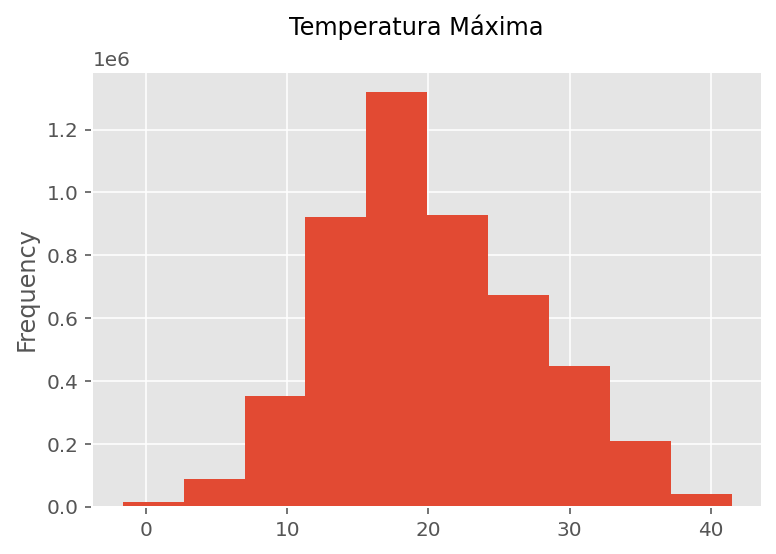

In [27]:
df_final['maximum_temperature'].plot(kind='hist',bins=10,title='Temperatura Máxima',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b25b2b7d0>],
      dtype=object)

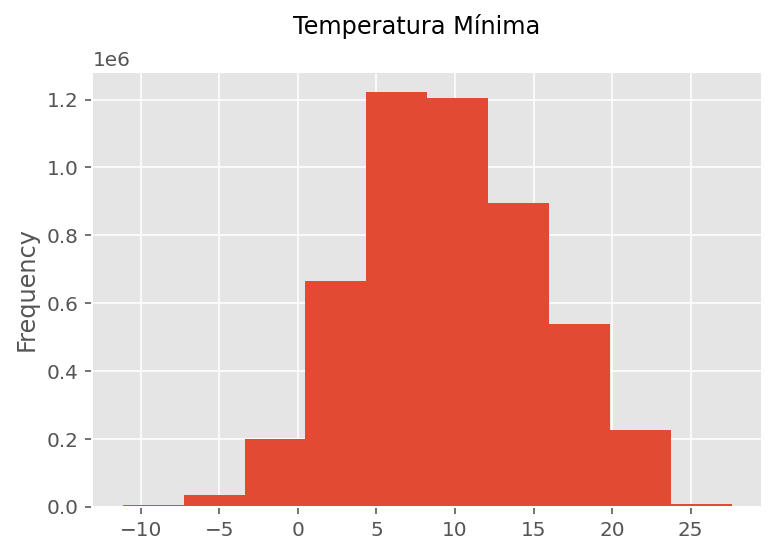

In [28]:
df_final['minimum_temperature'].plot(kind='hist',bins=10,title='Temperatura Mínima',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b25635390>],
      dtype=object)

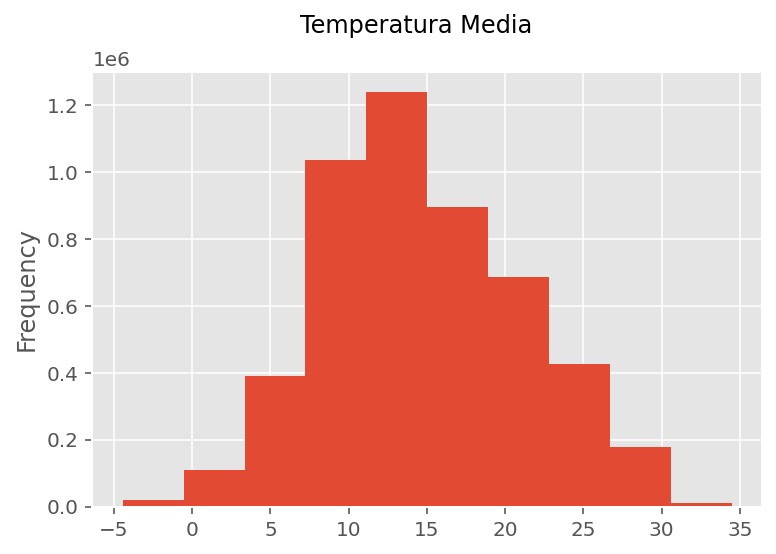

In [29]:
df_final['average_temperature'].plot(kind='hist',bins=10,title='Temperatura Media',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b255c5d10>],
      dtype=object)

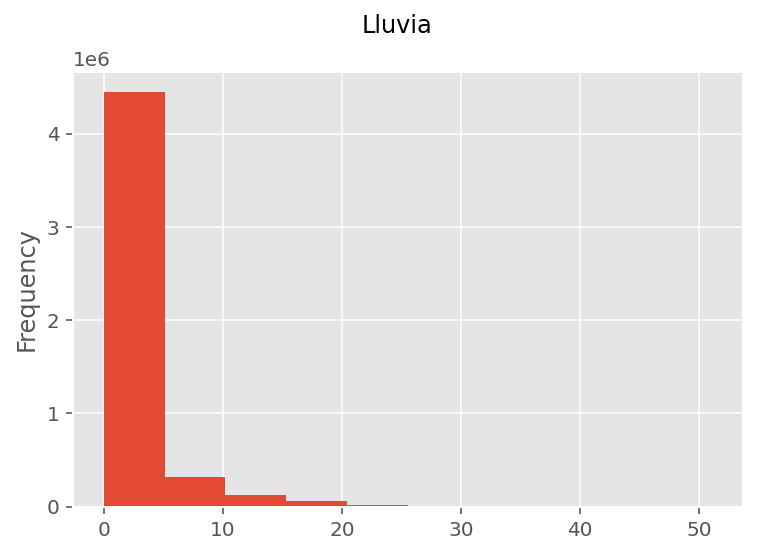

In [30]:
df_final['rainfall'].plot(kind='hist',bins=10,title='Lluvia',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b254def50>],
      dtype=object)

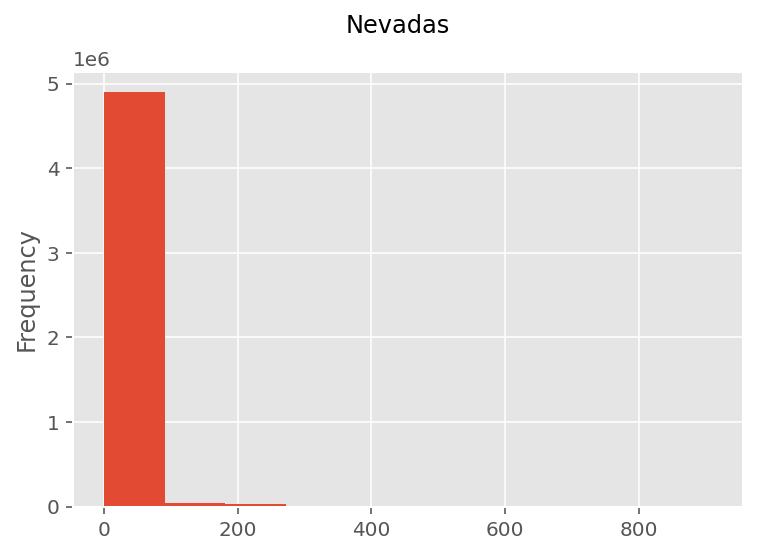

In [31]:
df_final['snowfall'].plot(kind='hist',bins=10,title='Nevadas',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b254d2e10>],
      dtype=object)

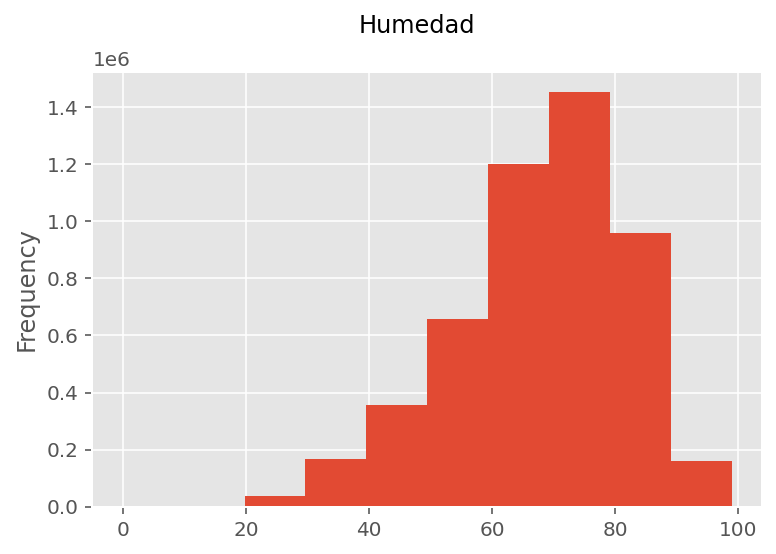

In [32]:
df_final['relative_humidity'].plot(kind='hist',bins=10,title='Humedad',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b253fa3d0>],
      dtype=object)

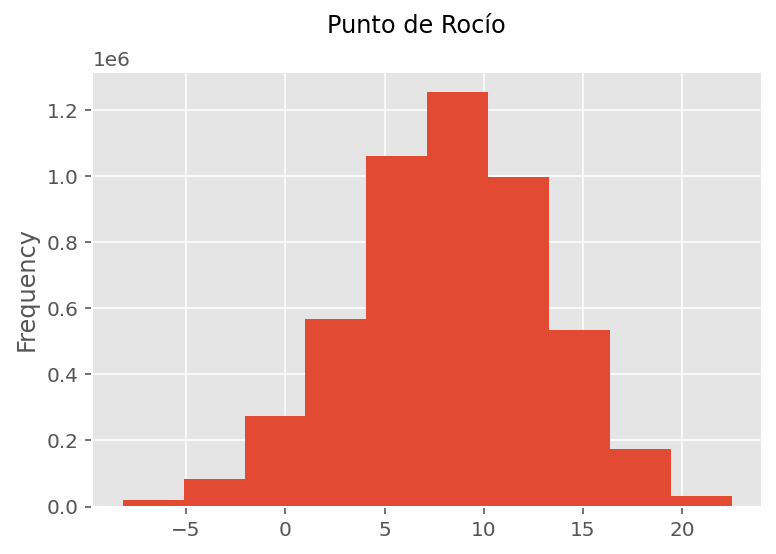

In [33]:
df_final['dew_point'].plot(kind='hist',bins=10,title='Punto de Rocío',subplots=True)

In [34]:
df_final_atipicos = df_final
def atipicos(df,Columnas):
  for c in Columnas:
    IQR=np.percentile(df[c],75)-np.percentile(df[c],25)
    M=np.mean(df[c])
    CEINF=M-3*IQR
    CESUP=M+3*IQR
    df['Atipicos_Cerc_'+c]=(df[c]<CEINF)|(df[c]>CESUP)
    df['Atipicos_Perc_'+c]=(df[c]<np.percentile(df[c],1))|(df[c]>np.percentile(df[c],99))
atipicos(df_final_atipicos,['maximum_temperature','minimum_temperature', 
                'rainfall', 'snowfall', 'average_temperature', 'relative_humidity', 'dew_point', 'uci', 'fallecidos', 'confirmados', 'hospitalizados'])


In [35]:
def PROC_FREQ(df,columnas):
  for c in columnas:
    x=df[c].value_counts().to_frame()
    nombre=x.columns.tolist()[0]
    x.rename(columns={nombre:'Freq'},inplace=True)
    x['Pct']=x['Freq']/x.Freq.sum()
    x['Freq Acum'],x['Pct Acum']=x.Freq.cumsum(),x.Pct.cumsum()
    x.sort_values(['Freq'],ascending=[0],inplace=True)
    print('Tabla de distribución de frecuencias para la variable: '+nombre)
    print('\n')
    print(x)
    print('\n')

cols = [c for c in df_final_atipicos.columns if 'Atipicos' in c]
PROC_FREQ(df_final_atipicos,cols)

Tabla de distribución de frecuencias para la variable: Atipicos_Cerc_maximum_temperature


          Freq  Pct  Freq Acum  Pct Acum
False  4993319  1.0    4993319       1.0


Tabla de distribución de frecuencias para la variable: Atipicos_Perc_maximum_temperature


          Freq       Pct  Freq Acum  Pct Acum
False  4894431  0.980196    4894431  0.980196
True     98888  0.019804    4993319  1.000000


Tabla de distribución de frecuencias para la variable: Atipicos_Cerc_minimum_temperature


          Freq  Pct  Freq Acum  Pct Acum
False  4993319  1.0    4993319       1.0


Tabla de distribución de frecuencias para la variable: Atipicos_Perc_minimum_temperature


          Freq       Pct  Freq Acum  Pct Acum
False  4894409  0.980192    4894409  0.980192
True     98910  0.019808    4993319  1.000000


Tabla de distribución de frecuencias para la variable: Atipicos_Cerc_rainfall


          Freq       Pct  Freq Acum  Pct Acum
False  4575632  0.916351    4575632  0.916351
True    417687  

Text(0, 0.5, 'Conteo')

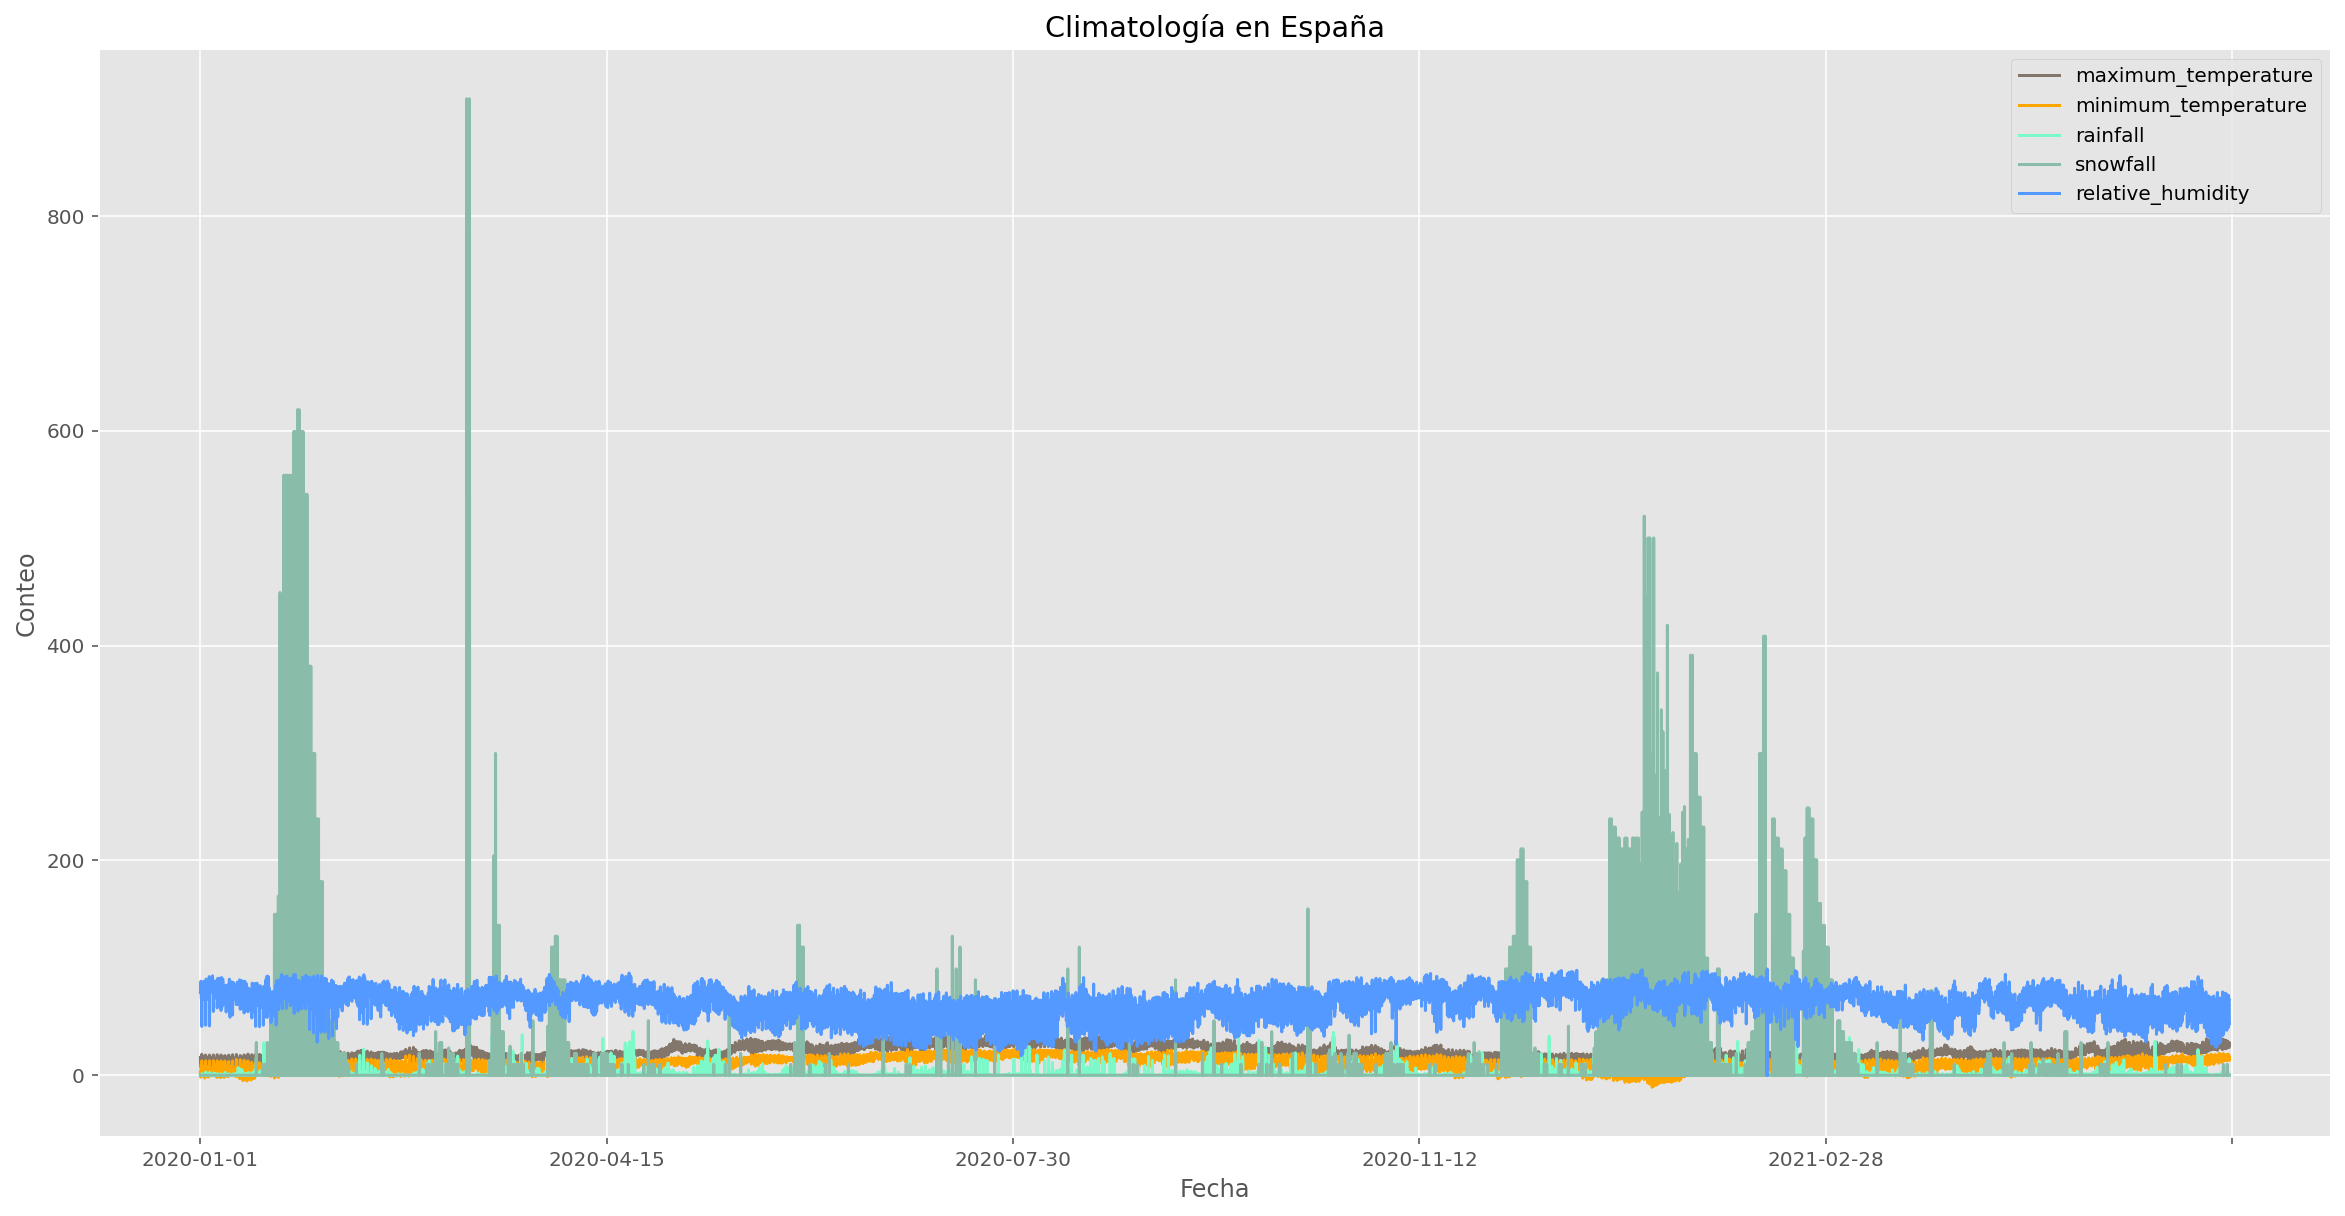

In [36]:
style.use('ggplot')
ax = plt.gca()
df_final.plot.line(x='date', y='maximum_temperature', color='#83776B', ax=ax, figsize=(20, 10))
df_final.plot.line(x='date', y='minimum_temperature', color='orange', ax=ax)
df_final.plot.line(x='date', y='rainfall', color='#7BF9C9', ax=ax)
df_final.plot.line(x='date', y='snowfall', color='#89BDAA', ax=ax)
df_final.plot.line(x='date', y='relative_humidity', color='#5399FF', ax=ax)
plt.title('Climatología en España')
plt.xlabel('Fecha')
plt.ylabel('Conteo')

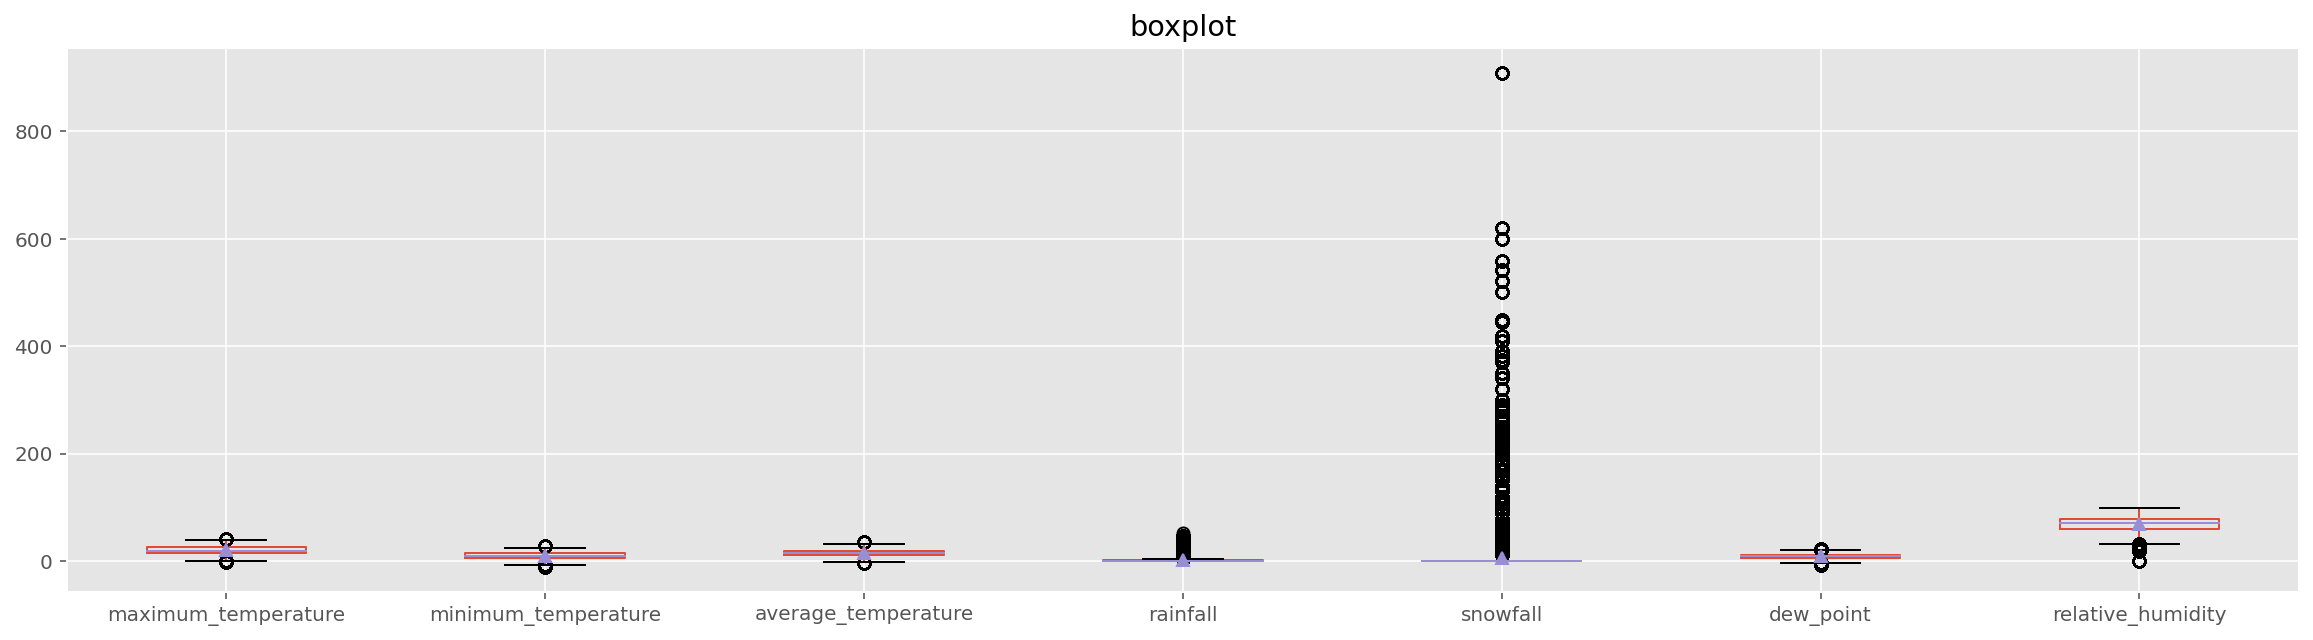

In [37]:
#BOXPLOT DATOS CLIMATOLÓGICOS
ax = df_final[['maximum_temperature', 'minimum_temperature', 'average_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity']].plot(kind='box', title='boxplot', showmeans=True, figsize=(20, 5))
plt.show()

In [38]:
#Creamos un dataframe para cada variable epidemiológica con la información de climatología 
df_confirmados = df_final[['key','average_temperature', 'maximum_temperature', 'minimum_temperature','rainfall','snowfall','dew_point','relative_humidity','confirmados']].copy()
df_confirmados = df_confirmados.fillna(0)

df_hospitalizados = df_final[['key','average_temperature', 'maximum_temperature', 'minimum_temperature','rainfall','snowfall','dew_point','relative_humidity','hospitalizados']].copy()
df_hospitalizados = df_hospitalizados.fillna(0)

df_uci = df_final[['key','average_temperature', 'maximum_temperature', 'minimum_temperature','rainfall','snowfall','dew_point','relative_humidity','uci']].copy()
df_uci = df_uci.fillna(0)

df_fallecidos = df_final[['key','average_temperature', 'maximum_temperature', 'minimum_temperature','rainfall','snowfall','dew_point','relative_humidity','fallecidos']].copy()
df_fallecidos = df_fallecidos.fillna(0)


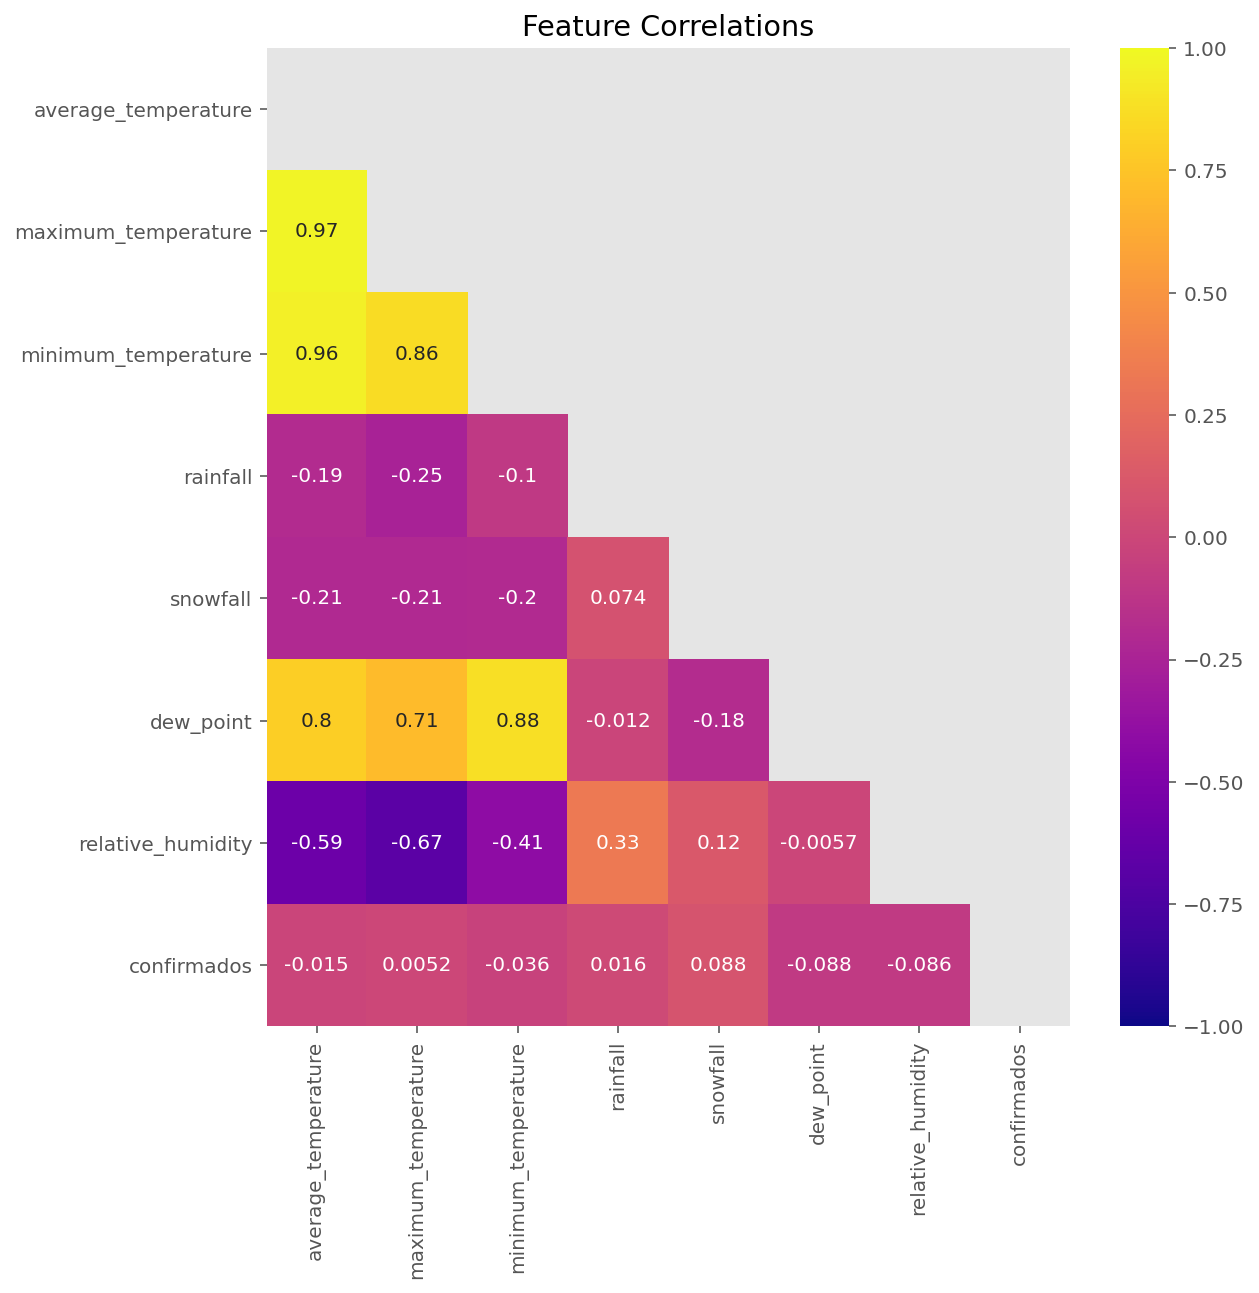

In [39]:
#MATRIZ DE CORRELACIONES CONFIRMADOS
colormap = plt.cm.plasma
matrix1 = np.triu(df_confirmados.corr())
plt.figure(figsize=(9, 9))
sns.heatmap(df_confirmados.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

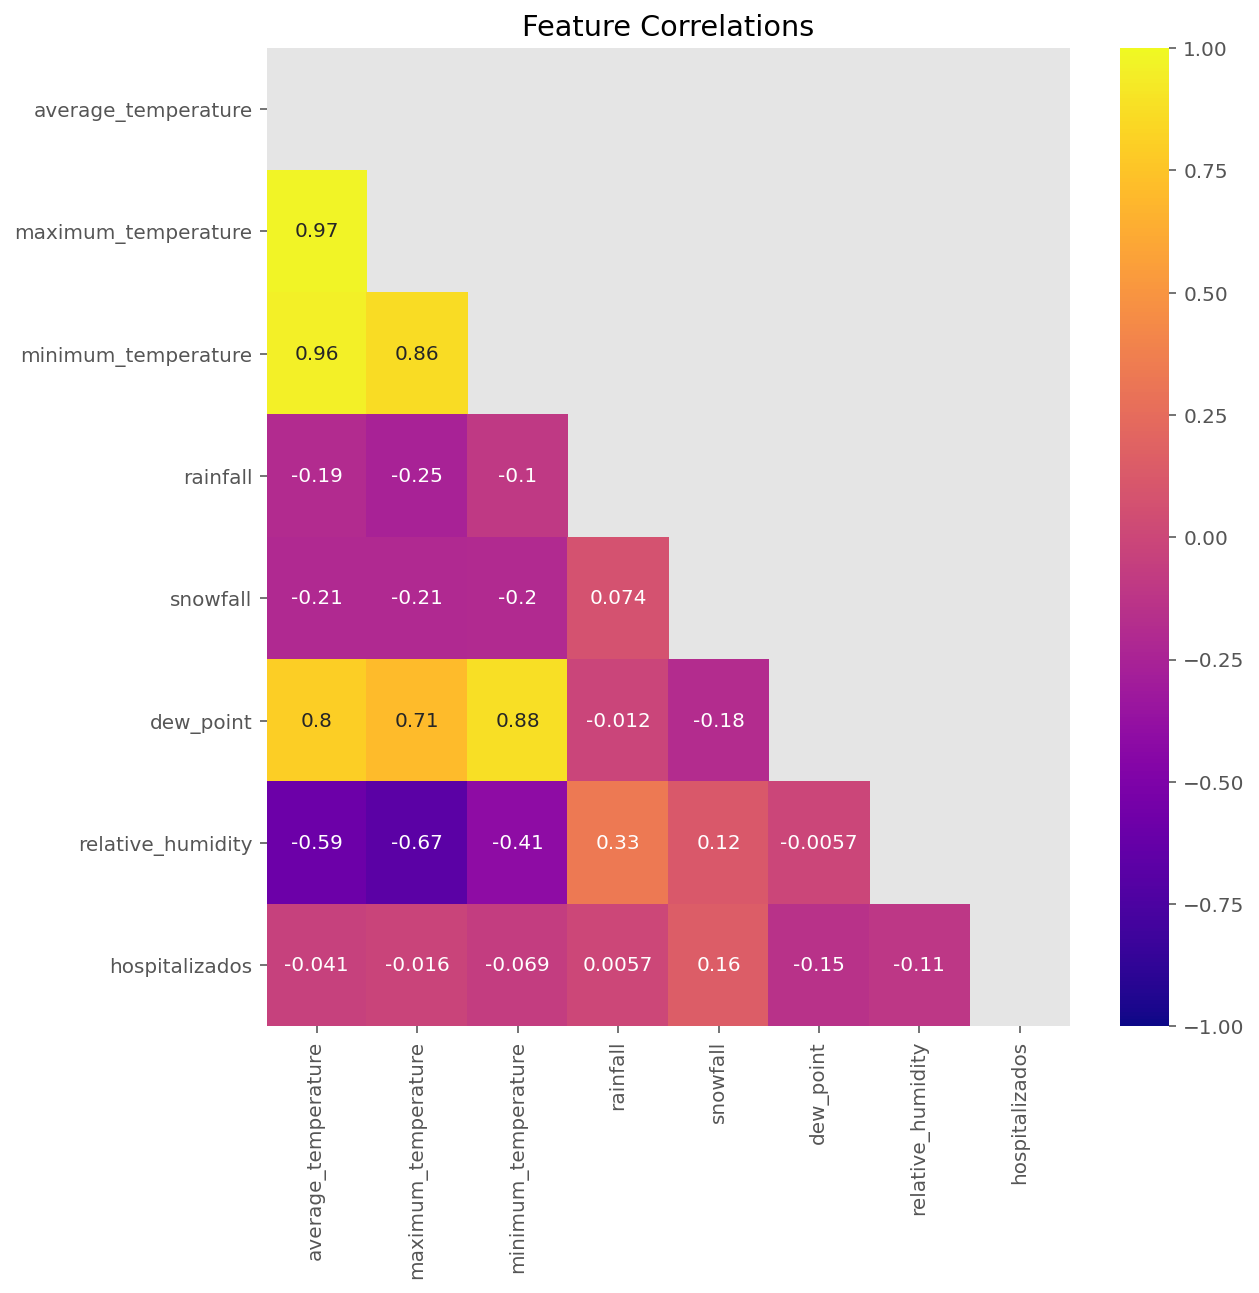

In [40]:
#MATRIZ DE CORRELACIONES HOSPITALIZADOS
colormap = plt.cm.plasma
matrix1 = np.triu(df_hospitalizados.corr())
plt.figure(figsize=(9, 9))
sns.heatmap(df_hospitalizados.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

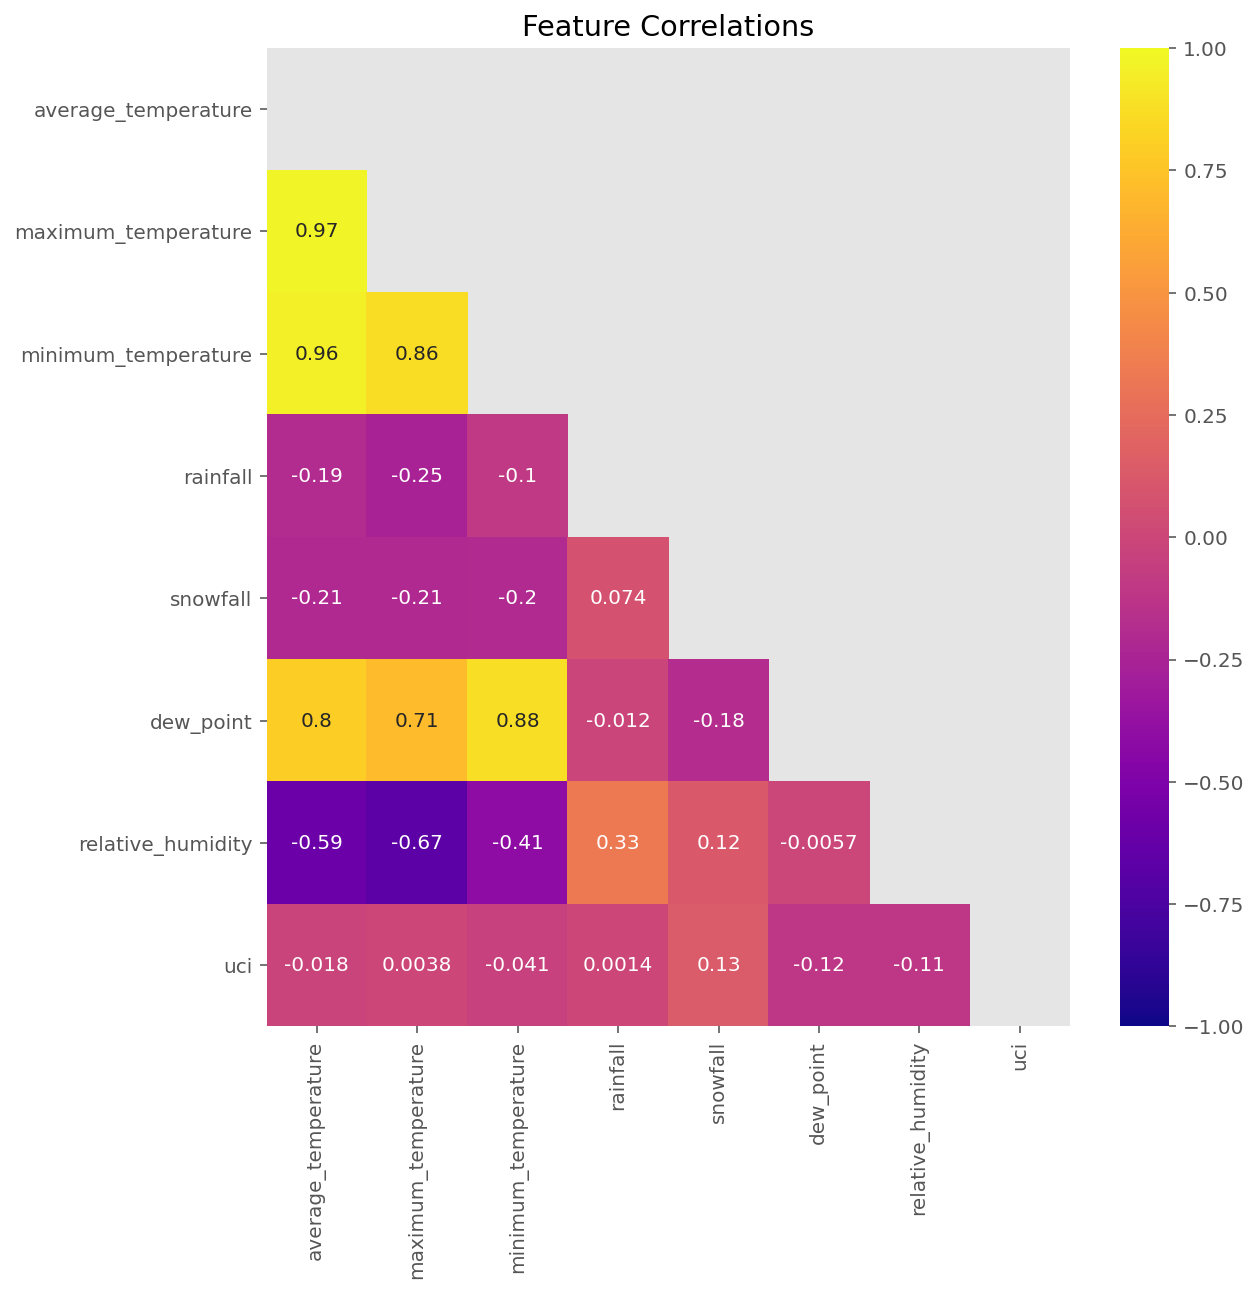

In [41]:
#MATRIZ DE CORRELACIONES UCI
colormap = plt.cm.plasma
matrix1 = np.triu(df_uci.corr())
plt.figure(figsize=(9, 9))
sns.heatmap(df_uci.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

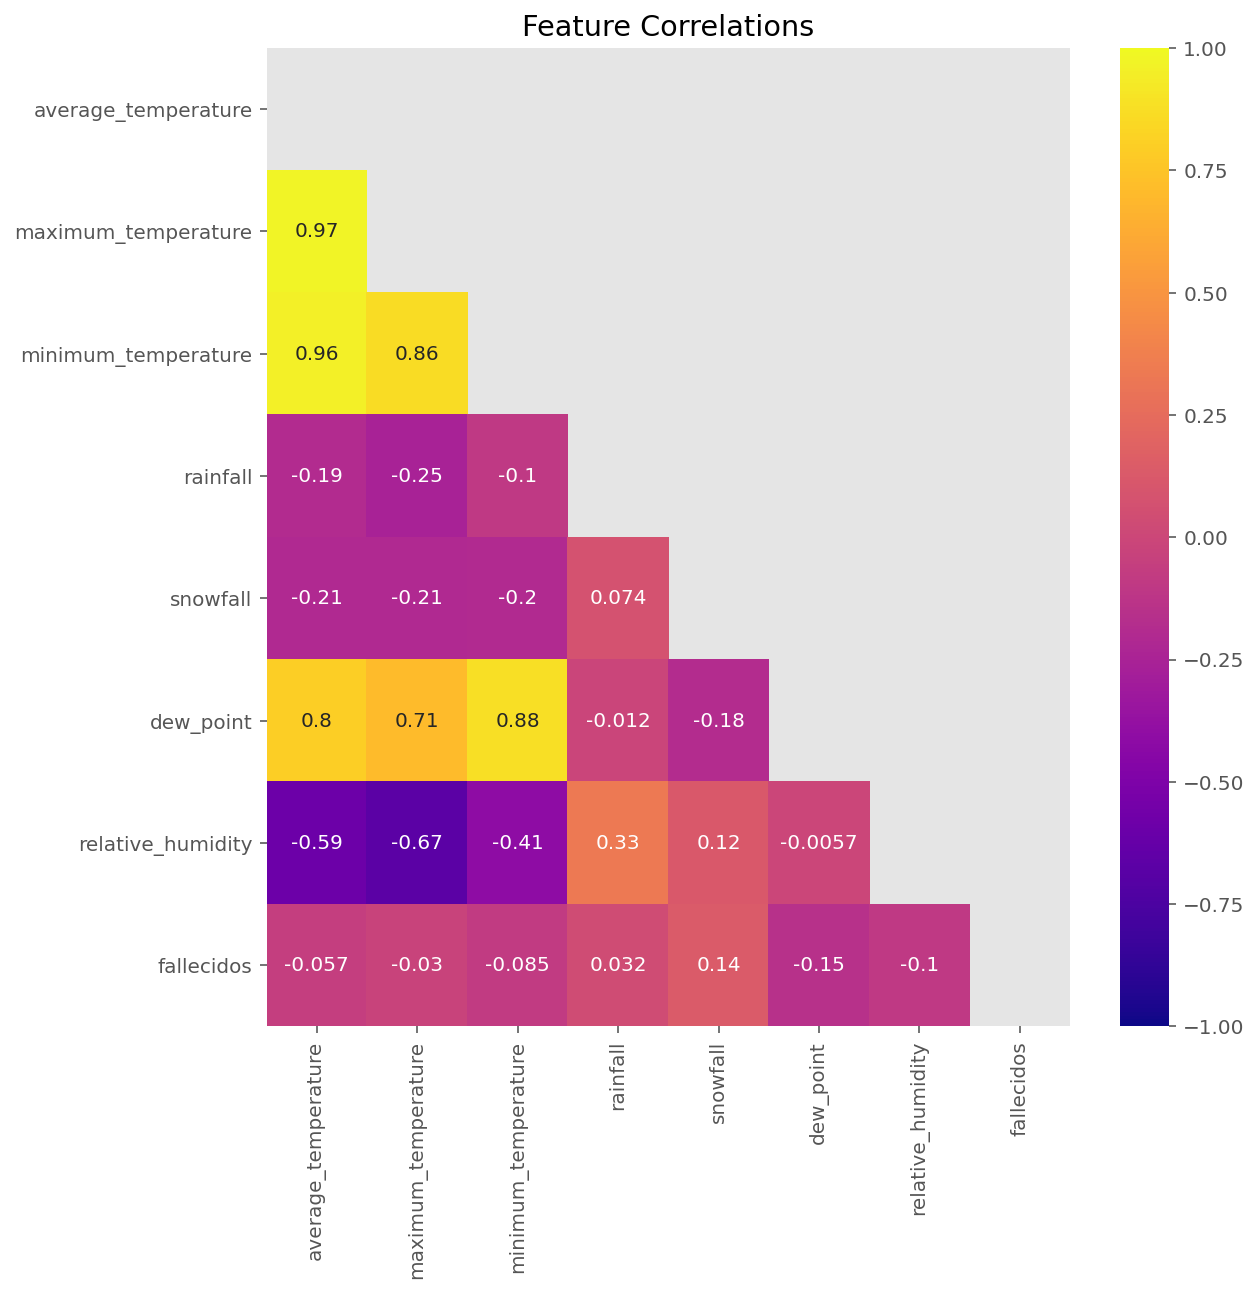

In [42]:
#MATRIZ DE CORRELACIONES FALLECIDOS
colormap = plt.cm.plasma
matrix1 = np.triu(df_fallecidos.corr())
plt.figure(figsize=(9, 9))
sns.heatmap(df_fallecidos.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

In [43]:
#ANALISIS CLUSTER CONFIRMADOS


cols_needed1=['average_temperature', 'maximum_temperature',
       'minimum_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'confirmados']

In [44]:
if len(cols_needed1)==0:
    data2_sub1=df_confirmados.select_dtypes(include='float')
else:
    data2_sub1=df_confirmados[cols_needed1]
data2_sub1=pd.concat([data2_sub1,df_confirmados[['key']]],axis=1)
data2_sub1=data2_sub1.groupby('key').mean().reset_index()
data2_sub1.fillna(0,inplace=True)

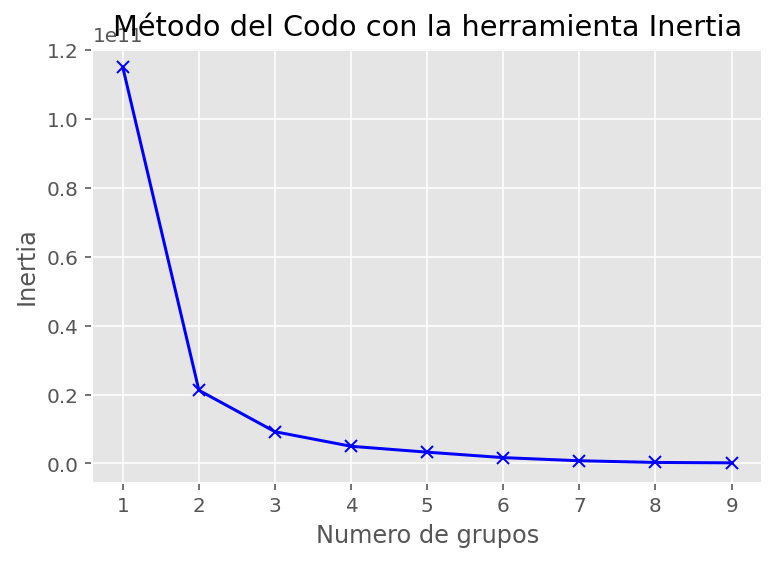

In [45]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub1.drop(['key'],axis=1)) 
    kmeanModel.fit(data2_sub1.drop(['key'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [46]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub1.drop(['key'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub1=data2_sub1.drop(['key'],axis=1)
# Adding cluster to the Dataset
today_sub1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub1.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,confirmados
cluster,,,,,,,,
1,15.4,20.2,10.8,1.7,1.2,9.5,70.3,15296.4
2,16.5,22.7,10.8,1.1,0.8,8.6,62.8,158914.4
3,13.9,19.7,8.7,1.9,8.5,7.5,67.9,60815.1
4,13.8,19.1,8.9,2.6,22.3,6.8,65.7,252636.8


In [47]:
today_Sub_2a=pd.concat([data2_sub1[['key']],today_sub1],axis=1)
today_Sub_2a.head(5)

,key,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,confirmados,cluster
0,Andalucía,16.961639,23.454872,10.987465,1.020031,0.260266,8.765827,62.132057,185488.775665,2
1,Aragón,13.397704,20.020957,7.664180,1.295233,4.424516,6.610293,65.591709,48120.076046,3
2,Asturias,12.873877,17.853403,8.409334,2.473802,1.237065,8.235945,75.101887,17537.273764,1
3,Canarias,19.323638,22.823630,16.177812,0.458015,0.000000,11.470625,63.187642,17986.001901,1
4,Cantabria,12.151254,17.556159,7.315282,2.154231,3.058925,7.304744,73.965990,11081.610266,1


In [48]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2a[today_Sub_2a.cluster==i]['key'].values))

****Comunidades autónomas en el grupo 1*****
['Asturias', 'Canarias', 'Cantabria', 'Ceuta y Melilla', 'Ceuta y Melilla ', 'Extremadura', 'Islas Baleares', 'La Rioja', 'Navarra']
****Comunidades autónomas en el grupo 2*****
['Andalucía', 'Comunidad Valenciana']
****Comunidades autónomas en el grupo 3*****
['Aragón', 'Castilla y León', 'Castilla-La Mancha', 'Galicia', 'Murcia', 'País Vasco']
****Comunidades autónomas en el grupo 4*****
['Cataluña', 'Madrid']


In [49]:
import plotly.express as px
fig = px.treemap(today_Sub_2a, path=['cluster','key'], values='confirmados')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [50]:
#ANALISIS CLUSTER HOSPITALIZADOS


cols_needed2=['average_temperature', 'maximum_temperature',
       'minimum_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'hospitalizados']

In [51]:
if len(cols_needed2)==0:
    data2_sub2=df_hospitalizados.select_dtypes(include='float')
else:
    data2_sub2=df_hospitalizados[cols_needed2]
data2_sub2=pd.concat([data2_sub2,df_hospitalizados[['key']]],axis=1)
data2_sub2=data2_sub2.groupby('key').mean().reset_index()
data2_sub2.fillna(0,inplace=True)

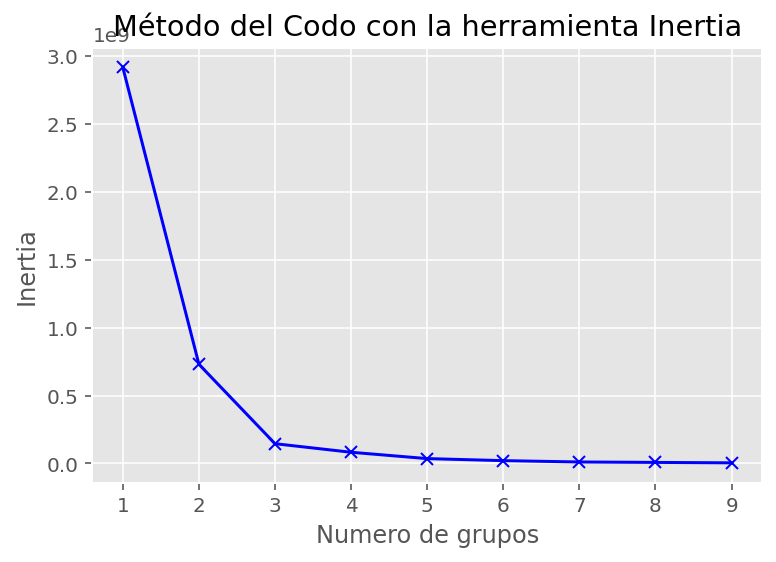

In [52]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub2.drop(['key'],axis=1)) 
    kmeanModel.fit(data2_sub2.drop(['key'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [53]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub2.drop(['key'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub1=data2_sub2.drop(['key'],axis=1)
# Adding cluster to the Dataset
today_sub1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub1.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,hospitalizados
cluster,,,,,,,,
1,15.5,21.2,10.3,2.4,3.4,8.5,66.0,20132.9
2,15.3,20.3,10.5,1.8,1.5,9.3,69.9,2635.5
3,13.7,19.3,8.2,1.5,38.1,5.3,61.6,54619.2
4,13.8,19.6,8.4,1.7,11.4,6.8,66.2,11635.1


In [54]:
today_Sub_2a=pd.concat([data2_sub2[['key']],today_sub1],axis=1)
today_Sub_2a.head(5)

,key,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,hospitalizados,cluster
0,Andalucía,16.961639,23.454872,10.987465,1.020031,0.260266,8.765827,62.132057,17391.136882,1
1,Aragón,13.397704,20.020957,7.664180,1.295233,4.424516,6.610293,65.591709,5887.013308,2
2,Asturias,12.873877,17.853403,8.409334,2.473802,1.237065,8.235945,75.101887,3237.190114,2
3,Canarias,19.323638,22.823630,16.177812,0.458015,0.000000,11.470625,63.187642,2175.013308,2
4,Cantabria,12.151254,17.556159,7.315282,2.154231,3.058925,7.304744,73.965990,1170.844106,2


In [55]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2a[today_Sub_2a.cluster==i]['key'].values))

****Comunidades autónomas en el grupo 1*****
['Andalucía', 'Cataluña']
****Comunidades autónomas en el grupo 2*****
['Aragón', 'Asturias', 'Canarias', 'Cantabria', 'Ceuta y Melilla', 'Ceuta y Melilla ', 'Extremadura', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra']
****Comunidades autónomas en el grupo 3*****
['Madrid']
****Comunidades autónomas en el grupo 4*****
['Castilla y León', 'Castilla-La Mancha', 'Comunidad Valenciana', 'País Vasco']


In [56]:
#import plotly.express as px
fig = px.treemap(today_Sub_2a, path=['cluster','key'], values='hospitalizados')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [57]:
#ANALISIS CLUSTER UCI


cols_needed3=['average_temperature', 'maximum_temperature',
       'minimum_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'uci']

In [58]:
if len(cols_needed3)==0:
    data2_sub3=df_uci.select_dtypes(include='float')
else:
    data2_sub3=df_uci[cols_needed3]
data2_sub3=pd.concat([data2_sub3,df_uci[['key']]],axis=1)
data2_sub3=data2_sub3.groupby('key').mean().reset_index()
data2_sub3.fillna(0,inplace=True)

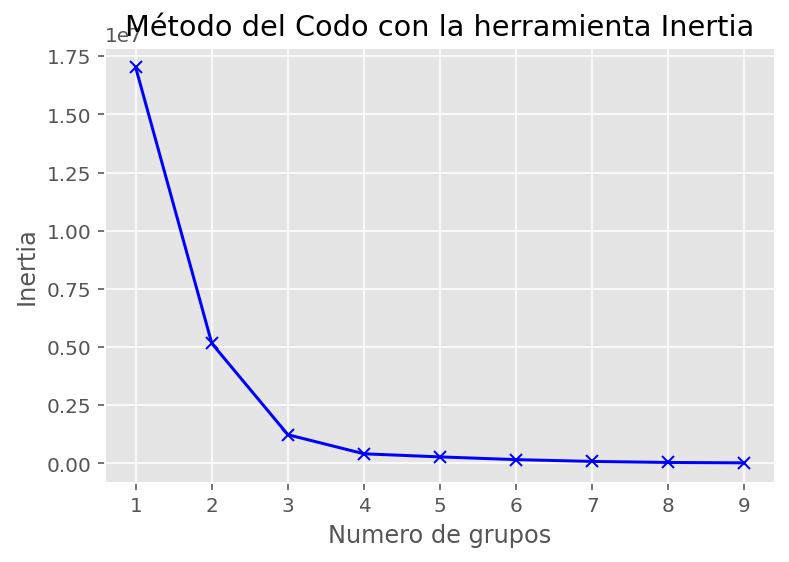

In [59]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub3.drop(['key'],axis=1)) 
    kmeanModel.fit(data2_sub3.drop(['key'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [60]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub3.drop(['key'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub1=data2_sub3.drop(['key'],axis=1)
# Adding cluster to the Dataset
today_sub1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub1.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,uci
cluster,,,,,,,,
1,13.9,19.7,8.7,1.9,8.5,7.5,67.9,688.4
2,13.7,19.3,8.2,1.5,38.1,5.3,61.6,4055.1
3,15.7,21.5,10.4,2.0,2.7,8.5,65.1,1767.8
4,15.4,20.2,10.8,1.7,1.2,9.5,70.3,211.1


In [61]:
today_Sub_2a=pd.concat([data2_sub3[['key']],today_sub1],axis=1)
today_Sub_2a.head(5)

,key,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,uci,cluster
0,Andalucía,16.961639,23.454872,10.987465,1.020031,0.260266,8.765827,62.132057,1901.133080,3
1,Aragón,13.397704,20.020957,7.664180,1.295233,4.424516,6.610293,65.591709,578.490494,1
2,Asturias,12.873877,17.853403,8.409334,2.473802,1.237065,8.235945,75.101887,285.142586,4
3,Canarias,19.323638,22.823630,16.177812,0.458015,0.000000,11.470625,63.187642,424.340304,4
4,Cantabria,12.151254,17.556159,7.315282,2.154231,3.058925,7.304744,73.965990,156.587452,4


In [62]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2a[today_Sub_2a.cluster==i]['key'].values))

****Comunidades autónomas en el grupo 1*****
['Aragón', 'Castilla y León', 'Castilla-La Mancha', 'Galicia', 'Murcia', 'País Vasco']
****Comunidades autónomas en el grupo 2*****
['Madrid']
****Comunidades autónomas en el grupo 3*****
['Andalucía', 'Cataluña', 'Comunidad Valenciana']
****Comunidades autónomas en el grupo 4*****
['Asturias', 'Canarias', 'Cantabria', 'Ceuta y Melilla', 'Ceuta y Melilla ', 'Extremadura', 'Islas Baleares', 'La Rioja', 'Navarra']


In [63]:
#import plotly.express as px
fig = px.treemap(today_Sub_2a, path=['cluster','key'], values='uci')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [64]:
#ANALISIS CLUSTER FALLECIDOS


cols_needed4=['average_temperature', 'maximum_temperature',
       'minimum_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'fallecidos']

In [65]:
if len(cols_needed3)==0:
    data2_sub4=df_fallecidos.select_dtypes(include='float')
else:
    data2_sub4=df_fallecidos[cols_needed4]
data2_sub4=pd.concat([data2_sub4,df_fallecidos[['key']]],axis=1)
data2_sub4=data2_sub4.groupby('key').mean().reset_index()
data2_sub4.fillna(0,inplace=True)

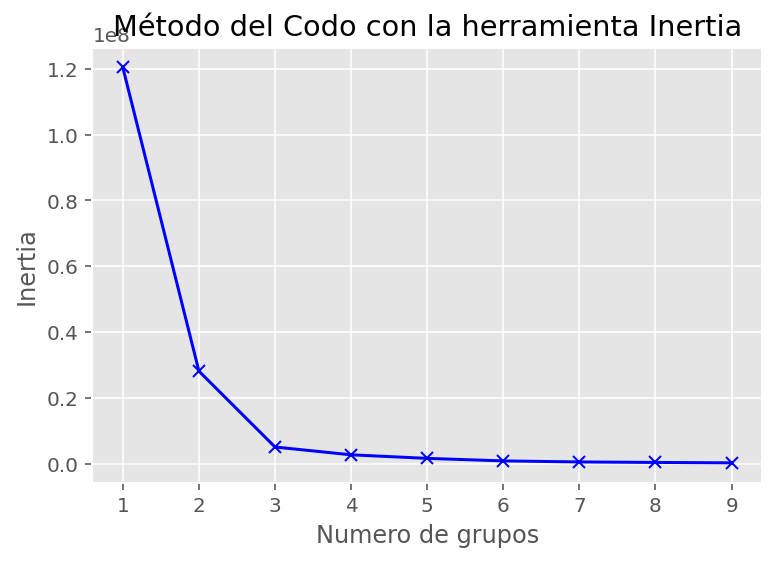

In [66]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub4.drop(['key'],axis=1)) 
    kmeanModel.fit(data2_sub4.drop(['key'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [67]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub4.drop(['key'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub1=data2_sub4.drop(['key'],axis=1)
# Adding cluster to the Dataset
today_sub1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub1.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,fallecidos
cluster,,,,,,,,
1,15.4,20.3,10.8,1.8,1.2,9.5,70.3,488.2
2,13.8,19.1,8.9,2.6,22.3,6.8,65.7,8520.8
3,14.8,20.9,9.1,1.2,10.4,7.0,63.4,3390.5
4,13.1,19.1,7.9,2.1,4.3,7.3,69.5,1905.0


In [68]:
today_Sub_2a=pd.concat([data2_sub4[['key']],today_sub1],axis=1)
today_Sub_2a.head(5)

,key,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,fallecidos,cluster
0,Andalucía,16.961639,23.454872,10.987465,1.020031,0.260266,8.765827,62.132057,3714.942966,3
1,Aragón,13.397704,20.020957,7.664180,1.295233,4.424516,6.610293,65.591709,1661.209125,4
2,Asturias,12.873877,17.853403,8.409334,2.473802,1.237065,8.235945,75.101887,794.026616,1
3,Canarias,19.323638,22.823630,16.177812,0.458015,0.000000,11.470625,63.187642,307.520913,1
4,Cantabria,12.151254,17.556159,7.315282,2.154231,3.058925,7.304744,73.965990,281.971483,1


In [69]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2a[today_Sub_2a.cluster==i]['key'].values))

****Comunidades autónomas en el grupo 1*****
['Asturias', 'Canarias', 'Cantabria', 'Ceuta y Melilla', 'Ceuta y Melilla ', 'Extremadura', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra']
****Comunidades autónomas en el grupo 2*****
['Cataluña', 'Madrid']
****Comunidades autónomas en el grupo 3*****
['Andalucía', 'Castilla y León', 'Castilla-La Mancha', 'Comunidad Valenciana']
****Comunidades autónomas en el grupo 4*****
['Aragón', 'País Vasco']


In [70]:
#import plotly.express as px
fig = px.treemap(today_Sub_2a, path=['cluster','key'], values='fallecidos')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [71]:
#---------------------------------------------------

In [72]:
#MODELOS LINEALES
#Y1. Infectados
#Y2. Hospitalizados
#Y3. Uci
#Y4. Fallecidos

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# División de los datos en train y test
# ==============================================================================
X = df_confirmados.iloc[:,1:(len(df_confirmados.columns)-1)]
y = df_confirmados['confirmados'] # confirmados totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
1,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
2,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
3,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
4,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656


In [73]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:27:50   Log-Likelihood:            -5.2705e+07
No. Observations:             3994655   AIC:                         1.054e+08
Df Residuals:                 3994647   BIC:                         1.054e+08
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9169.1470   2

In [74]:
# MODELO LINEAL HOSPITALIZADOS

X = df_hospitalizados.iloc[:,1:(len(df_hospitalizados.columns)-1)]
y = df_hospitalizados['hospitalizados'] # hospitalizados totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)


,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
1,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
2,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
3,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
4,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656


In [75]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                 4.001e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:29:34   Log-Likelihood:            -4.4202e+07
No. Observations:             3994655   AIC:                         8.840e+07
Df Residuals:                 3994647   BIC:                         8.840e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.973e+04    

In [76]:
# MODELO LINEAL UCI
X = df_uci.iloc[:,1:(len(df_uci.columns)-1)]
y = df_uci['uci'] # paciente en uci totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
1,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
2,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
3,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
4,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656


In [77]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                 3.148e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:31:32   Log-Likelihood:            -3.4114e+07
No. Observations:             3994655   AIC:                         6.823e+07
Df Residuals:                 3994647   BIC:                         6.823e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -916.8384    

In [78]:
# MODELO LINEAL FALLECIDOS
X = df_fallecidos.iloc[:,1:(len(df_fallecidos.columns)-1)]
y = df_fallecidos['fallecidos'] # paciente en uci totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
1,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
2,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
3,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
4,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656


In [79]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                 3.587e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:32:25   Log-Likelihood:            -3.7889e+07
No. Observations:             3994655   AIC:                         7.578e+07
Df Residuals:                 3994647   BIC:                         7.578e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1327.9306    